# CodeRefinery registration info

The anonymized registration data only contains affiliation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

Registration time (with personal info removed) kept in `personal` folder.

In [4]:
typeform_personal = "personal/"
indico_personal = "personal_indico/"
years = [2016, 2017, 2018]

#### Import (anonymous) personal info

Collect all data into single dataframe `df_personal`

In [9]:
dfs = []
keys = []
for f in glob.glob(typeform_personal+'/20*/*_processed.csv'):
    dfs.append(pd.read_csv(f))
    key = f.replace("/"," ").split()[1:]
    keys.append("-".join(key).replace(".csv",""))

df_personal = pd.concat(dfs, keys=keys, ignore_index=False, sort=False)
df_personal.head()

Unnamed: 0  Gender                Affiliation
2017-umea-oct_processed 0           0    Male  Department of Informatics
                        1           1  Female  Department of Informatics
                        2           2    Male      department of physics
                        3           3    Male     HPC2N, Umeå University
                        4           4    Male    HPC2N, Umeå universitet

In [11]:
xsize = 10
ysize = 10
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

### Gender

Male                 286
Female               110
Prefer not to say     11
Name: Gender, dtype: int64
total counts =  407


/Users/ktw/anaconda2/envs/juplab/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


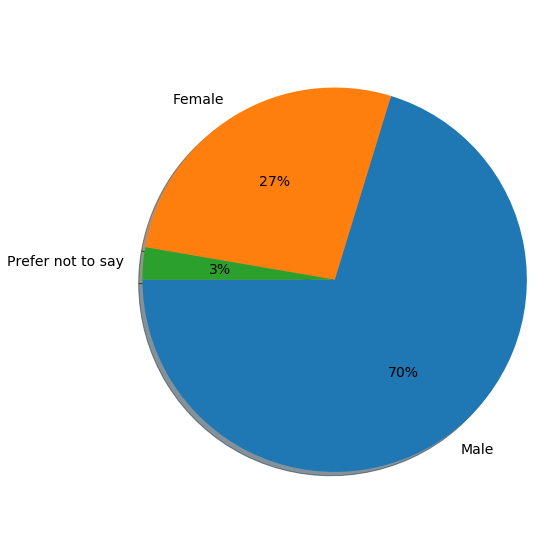

In [12]:
counts = df_personal["Gender"].value_counts()
print(counts)
print("total counts = ", sum(counts.values))
values = counts.values
labels = counts.index
fig1, ax1 = plt.subplots(figsize=(xsize-2,ysize-2))
ax1.pie(counts.values, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.figure.tight_layout()
plt.savefig("img/gender.png")
